In [1]:
# Tutorial is based on https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# Forged bank notes dataset

import pandas as pd
import numpy as np

data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]

bankdata = pd.read_csv(data_link, names=col_names, sep=",", header=None)
bankdata.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
bankdata['class'].unique()

array([0, 1], dtype=int64)

In [3]:
bankdata['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [4]:
bankdata['class'].value_counts(normalize=True)

class
0    0.555394
1    0.444606
Name: proportion, dtype: float64

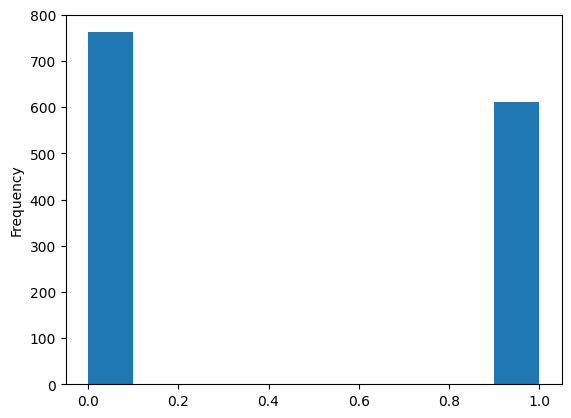

In [5]:
bankdata['class'].plot.hist();

In [6]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [7]:
# predictors vs class
y = bankdata['class']
X = bankdata.drop('class', axis=1) # axis=1 means dropping from the column axis

In [8]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [9]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 1097 samples for training and 275 samples for testing.


In [10]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',verbose=1)

In [11]:
svc.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', verbose=1)

In [12]:
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



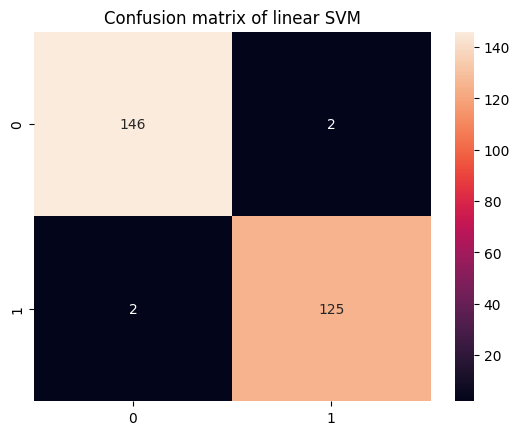

In [13]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       614
           1       0.98      0.99      0.99       483

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



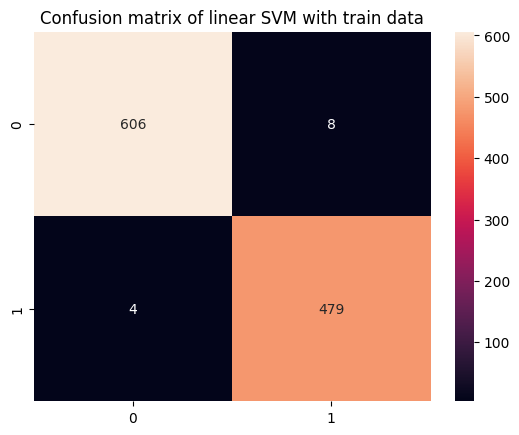

In [14]:
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

In [15]:
X_test.head()

,variance,skewness,curtosis,entropy
430,1.569100,6.3465,-0.1828,-2.4099
588,-0.278020,8.1881,-3.1338,-2.5276
296,0.051979,7.0521,-2.0541,-3.1508
184,-1.755900,11.9459,3.0946,-4.8978
244,2.428700,9.3821,-3.2477,-1.4543


In [16]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': 1}

In [17]:
print(svc.n_support_)

[19 16]


In [18]:
print(svc.coef_)

[[-2.38527586 -1.3827194  -1.66569688 -0.23719489]]


In [19]:
print(np.matmul(svc.dual_coef_,svc.support_vectors_))

[[-2.38527586 -1.3827194  -1.66569688 -0.23719489]]


In [20]:
decision_function = svc.decision_function(X_test)
print(decision_function)

[ -9.37914702  -2.57628299  -3.44328546 -14.05954161 -10.74838223
  -9.3801806  -10.33814127 -12.34639327 -10.57723216 -11.99784934
   1.08046242   5.24268197 -10.3676849    3.50459429  -9.54036049
   1.26936211   3.51186843   3.74847065   1.79742418   0.91224909
 -10.91290891 -11.56651232   1.37798557 -12.76612829   7.52125111
 -12.06689489 -13.94061975   3.99227381 -16.32947376 -15.68148386
   6.30404887 -10.14422846  -8.19740074   6.43276395   6.87939453
 -13.13933577   0.63261004   4.26591577   5.85805389 -10.99041781
 -11.70360856   5.85456815   3.81922569 -10.54444726   7.32276572
   3.8472821    6.0842172   -6.7320533   -7.84852716   2.00559208
  -6.83697353 -13.44214819  -9.26289141 -12.47586591  -8.32948069
   3.17821812  -7.7365619  -14.31377203  -7.04884015 -12.32850103
   5.8875578  -10.91678107   4.44171166 -14.90860737 -12.02263183
 -13.2938666  -11.90350326 -11.53170027  -5.56336161   4.8583083
   1.19759075 -10.01881214   3.28184653 -14.97297106   2.64301947
   0.623432

In [21]:
# write parameters and data to file
weights=open("./data-linear-model/weights.txt","w")
bias=open("./data-linear-model/bias.txt","w")
xtestSample="./data-linear-model/xtest.txt"
ytestSample=open("./data-linear-model/ytest.txt","w")
ytestClassificationScore="./data-linear-model/yclassificationscore.txt"

np.savetxt(weights,svc.coef_, delimiter=' ')
np.savetxt(bias,svc.intercept_, delimiter=' ')
#np.savetxt(xtestSample,X_test.head(1).iloc[0].values, delimiter=' ')
with open(xtestSample, "w") as f1:
    for item in X_test.head(1).iloc[0].values:
        f1.write(str(item) + " ")

np.savetxt(ytestSample,y_test.head(1), delimiter=' ')
with open(ytestClassificationScore, "w") as f2:
    f2.write(str(decision_function[0]))


weights.close()
bias.close()
ytestSample.close()
f1.close()
f2.close()